<a href="https://colab.research.google.com/github/Blandskron/Stable_Diffusion/blob/main/Stable_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stable Diffusion con Google Colab y DreamStudio

## Instalación de Transformers

In [ ]:
pip install --upgrade git+https://github.com/huggingface/diffusers.git transformers accelerate scipy

  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-pm17p54p
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-pm17p54p
  Resolved https://github.com/huggingface/diffusers.git to commit 48664d62b8e9f70d03b1be4059c1464a3b167f85
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


## Importando librerías

In [ ]:
import torch

## Estructura de Hugging Face

In [ ]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

model_id = "stabilityai/stable-diffusion-2-1"

# Use the Euler scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")




The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

## Generando imágenes

In [ ]:
prompt = 'a photo of a dog with a hat'
image = pipe(prompt).images[0]


  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
image.save('perrito.png')

## Tamaño de la imagen

In [ ]:
prompt = 'a photo of a dog with a hat'
image = pipe(prompt, height=512, width=768).images[0]


  0%|          | 0/50 [00:00<?, ?it/s]

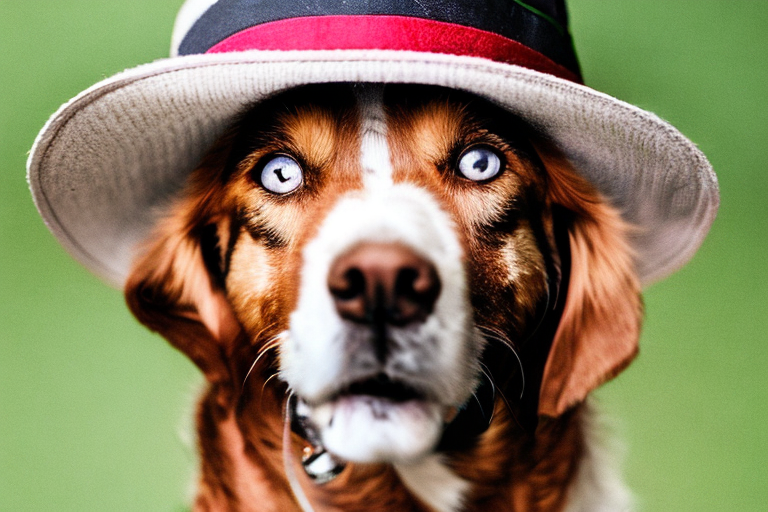

In [ ]:
image

## Pasos de iteración

In [ ]:
prompt = 'a photo of a dog with a hat'
image = pipe(prompt, height=512, width=768, num_inference_steps= 10).images[0]


  0%|          | 0/10 [00:00<?, ?it/s]

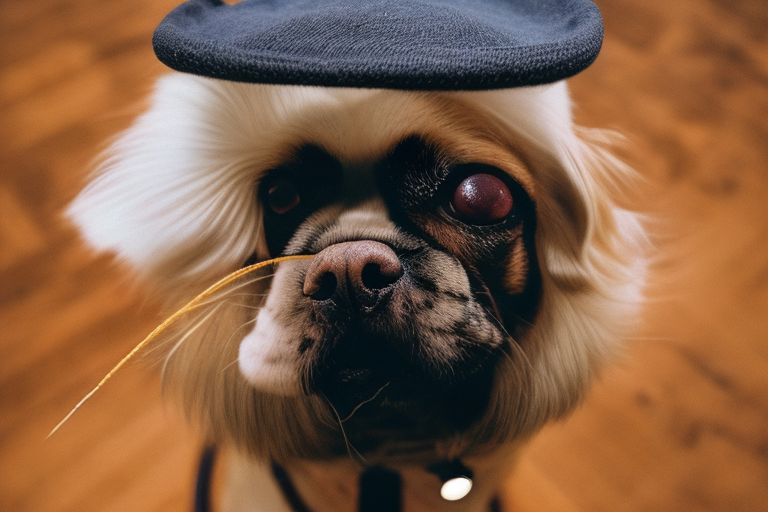

In [ ]:
image

## Guidance scale

In [ ]:
prompt = 'a photo of a dog with a hat'
image = pipe(prompt, height=512, width=768, num_inference_steps= 30, guidance_scale=12).images[0]


  0%|          | 0/30 [00:00<?, ?it/s]

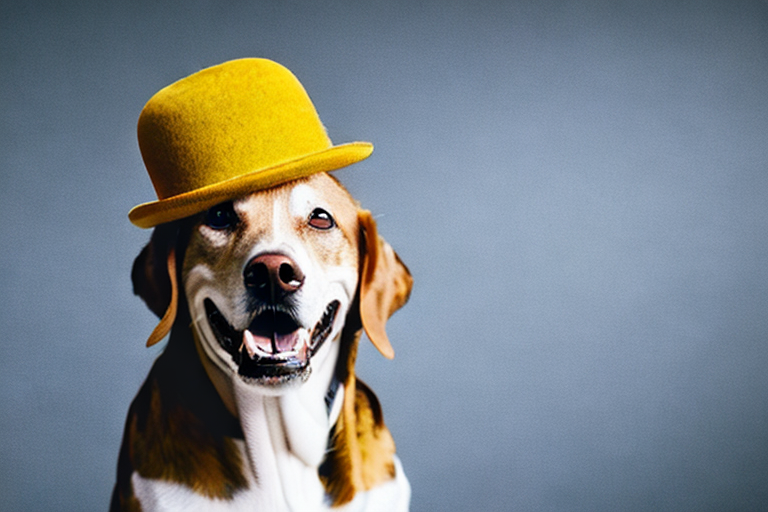

In [ ]:
image